## Data Cleaning

In [1]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# If you haven't downloaded NLTK stopwords, uncomment the lines below
# import nltk
# nltk.download('stopwords')

# Load the IMDB Dataset
df = pd.read_csv('IMDB Dataset.csv')

# Convert reviews to lowercase
df['review'] = df['review'].str.lower()

# Remove URLs from the reviews
df['review'] = df['review'].apply(lambda x: re.sub(r'http[s]?://\S+|www\.\S+', '', x, flags=re.IGNORECASE))

# Remove HTML tags from the reviews
df['review'] = df['review'].apply(lambda x: re.sub(r'<.*?>', '', x))

# Remove special characters from the reviews
df['review'] = df['review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]+', '', x))

# Define slang dictionary
slang_dict = {
    "lol": "laugh out loud",
    "smh": "shaking my head",
    "irl": "in real life",
    "brb": "be right back",
    "idk": "i don't know",
    "tbh": "to be honest",
    "rofl": "rolling on the floor laughing",
    "btw": "by the way",
    "omg": "oh my god",
    "yolo": "you only live once",
    "fomo": "fear of missing out",
    "tmi": "too much information",
    "lmk": "let me know",
    "nvm": "never mind",
    "wyd": "what you doing",
    "hmu": "hit me up",
    "afaik": "as far as i know",
    "np": "no problem",
    "ftw": "for the win",
    "ikr": "i know, right?",
    "gg": "good game",
    "sus": "suspicious",
    "bae": "before anyone else",
    "bff": "best friends forever",
    "jk": "just kidding",
    "thx": "thanks",
    "lmao": "laughing my ass off",
    "tldr": "too long; didn't read",
    "dm": "direct message",
    "fyi": "for your information"
}
slang_dict = {key.lower(): value.lower() for key, value in slang_dict.items()}

# Expand slangs in the reviews
df['review'] = df['review'].apply(lambda x: " ".join([slang_dict[word] if word in slang_dict else word for word in x.split()]))

# Get stop words
stop_words = set(stopwords.words('english'))

# Define function to remove stop words
def remove_stopwords(text):
    if not text:
        return ""
    words = re.findall(r'\b\w+\b', text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Remove stop words from the reviews
df['review'] = df['review'].apply(remove_stopwords)



## Integrity check of data cleaning

                                              review sentiment  has_html_tags  \
0  one reviewers mentioned watching 1 oz episode ...  positive          False   
1  wonderful little production filming technique ...  positive          False   
2  thought wonderful way spend time hot summer we...  positive          False   
3  basically theres family little boy jake thinks...  negative          False   
4  petter matteis love time money visually stunni...  positive          False   
5  probably alltime favorite movie story selfless...  positive          False   
6  sure would like see resurrection dated seahunt...  positive          False   
7  show amazing fresh innovative idea 70s first a...  negative          False   
8  encouraged positive comments film looking forw...  negative          False   
9  like original gut wrenching laughter like movi...  positive          False   

   has_url  has_slang  has_special_chars  contains_emoji  
0    False      False              False         

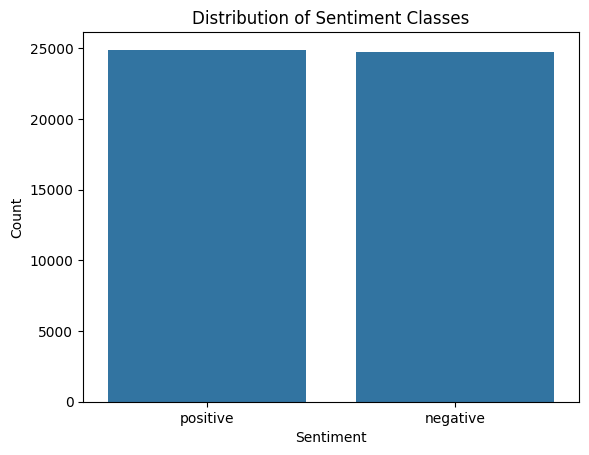

Sentiment Distribution (%):
 sentiment
positive    50.1896
negative    49.8104
Name: proportion, dtype: float64


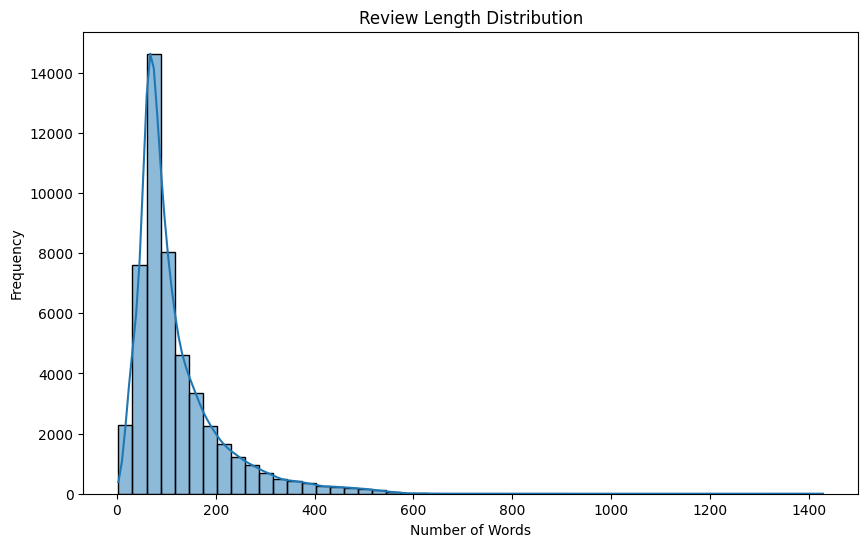

Review Length Statistics:
count    49578.000000
mean       119.898907
std         90.085512
min          3.000000
25%         64.000000
50%         89.000000
75%        146.000000
max       1429.000000
Name: review_length, dtype: float64
Most Common Words in Positive Reviews:
[('film', 39285), ('movie', 35830), ('one', 25622), ('like', 16998), ('good', 14285), ('great', 12568), ('story', 12339), ('see', 11814), ('time', 11725), ('well', 10930), ('really', 10638), ('also', 10516), ('would', 10320), ('even', 9318), ('much', 8974), ('first', 8818), ('films', 8433), ('love', 8363), ('people', 8333), ('best', 8269)]

Most Common Words in Negative Reviews:
[('movie', 47002), ('film', 34653), ('one', 24362), ('like', 21508), ('even', 14759), ('good', 13998), ('bad', 13903), ('would', 13482), ('really', 12084), ('time', 11350), ('see', 10412), ('dont', 9912), ('get', 9884), ('much', 9758), ('story', 9564), ('people', 8988), ('could', 8917), ('make', 8900), ('made', 8299), ('movies', 8284)]


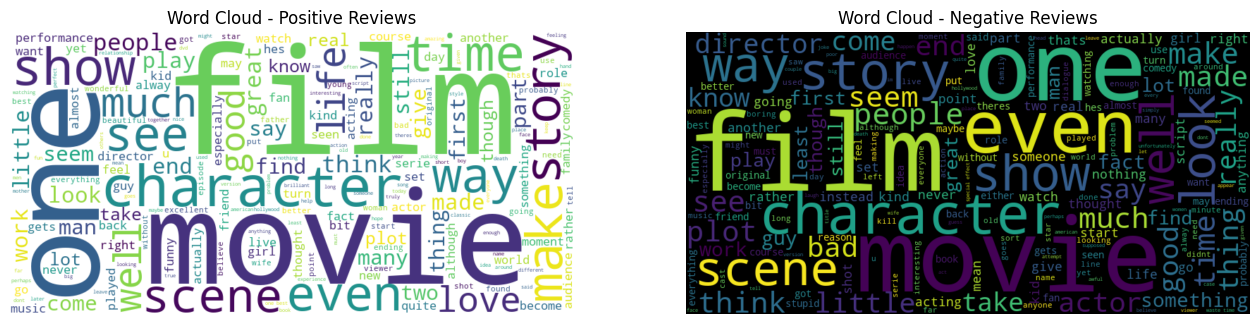

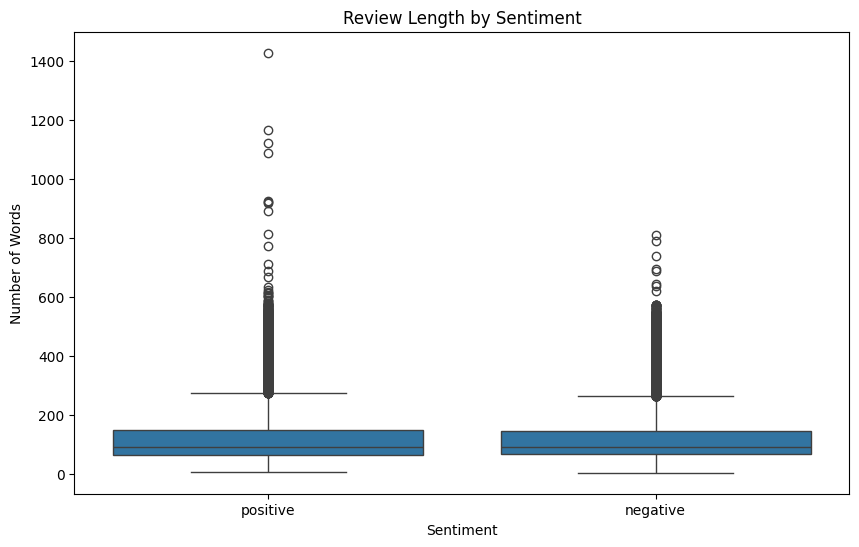

Average Review Length by Sentiment:
 sentiment
negative    118.556631
positive    121.231041
Name: review_length, dtype: float64
Top 10 Bigrams in Positive Reviews:
[('ive seen', 1491), ('dont know', 900), ('new york', 801), ('special effects', 761), ('years ago', 702), ('great movie', 667), ('good movie', 653), ('real life', 569), ('dont think', 568), ('saw movie', 563)]

Top 10 Trigrams in Positive Reviews:
[('new york city', 180), ('world war ii', 152), ('films ive seen', 125), ('based true story', 125), ('movies ive seen', 108), ('movie ive seen', 108), ('film ive seen', 96), ('seen long time', 86), ('highly recommend movie', 85), ('international film festival', 79)]

Top 10 Bigrams in Negative Reviews:
[('ive seen', 1797), ('special effects', 1361), ('waste time', 1336), ('dont know', 1279), ('looks like', 1245), ('look like', 939), ('low budget', 834), ('bad movie', 833), ('im sure', 800), ('watch movie', 732)]

Top 10 Trigrams in Negative Reviews:
[('dont waste time', 319), ('mo

In [2]:
# Function to check for HTML tags
def contains_html_tags(text):
    html_pattern = re.compile(r'</?[a-z][a-z0-9]*[^<>]*>', re.IGNORECASE)
    return bool(html_pattern.search(text))

# Function to check for URLs
def contains_url(text):
    url_pattern = re.compile(r'http[s]?://\S+|www\.\S+', re.IGNORECASE)
    return bool(url_pattern.search(text))

# Apply the functions to the 'review' column
df['has_html_tags'] = df['review'].apply(contains_html_tags)
df['has_url'] = df['review'].apply(contains_url)

# Get the set of slang words
slang_set = list(slang_dict.keys())

# Function to check for slangs in text
def contains_slang(text):
    words = text.split()
    return any(word in slang_set for word in words)

# Apply the function to check for slangs
df['has_slang'] = df['review'].apply(contains_slang)

# Function to check for special characters
def contains_special_characters(text):
    special_char_pattern = re.compile(r'[^A-Za-z0-9\s]')
    return bool(special_char_pattern.search(text))

# Apply the function to check for special characters
df['has_special_chars'] = df['review'].apply(contains_special_characters)

# Define regex pattern to detect emojis
emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002700-\U000027BF"  # Dingbats
    "\U0001F1E6-\U0001F1FF"  # Flags (iOS)
    "]+",
    flags=re.UNICODE
)

# Function to check for emojis
def contains_emoji(text):
    return bool(emoji_pattern.search(text))

# Apply the function to check for emojis
df['contains_emoji'] = df['review'].apply(contains_emoji)

# Display the first 10 rows of the DataFrame
print(df.head(10))

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for duplicates in the 'review' column
duplicates = df[df.duplicated(subset='review')]
print("Number of duplicate reviews:", len(duplicates))

# Drop duplicates from the 'review' column
df = df.drop_duplicates(subset='review')

# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Display percentage distribution of sentiments
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
print("Sentiment Distribution (%):\n", sentiment_counts)

# Calculate the length of each review
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot histogram of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics of review lengths
print("Review Length Statistics:")
print(df['review_length'].describe())

from collections import Counter
from wordcloud import WordCloud

# Function to get most common words
def get_most_common_words(reviews, num_words=20):
    words = ' '.join(reviews).lower().split()
    common_words = Counter(words).most_common(num_words)
    return common_words

# Get most common words in positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['review']
negative_reviews = df[df['sentiment'] == 'negative']['review']

print("Most Common Words in Positive Reviews:")
print(get_most_common_words(positive_reviews))

print("\nMost Common Words in Negative Reviews:")
print(get_most_common_words(negative_reviews))

# Visualize most common words with word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(negative_reviews))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')
plt.show()

# Boxplot of review length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()

# Average length of positive vs. negative reviews
avg_length_by_sentiment = df.groupby('sentiment')['review_length'].mean()
print("Average Review Length by Sentiment:\n", avg_length_by_sentiment)

from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams
def get_top_ngrams(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top bigrams and trigrams in positive reviews
print("Top 10 Bigrams in Positive Reviews:")
print(get_top_ngrams(positive_reviews, ngram_range=(2, 2), n=10))

print("\nTop 10 Trigrams in Positive Reviews:")
print(get_top_ngrams(positive_reviews, ngram_range=(3, 3), n=10))

# Get top bigrams and trigrams in negative reviews
print("\nTop 10 Bigrams in Negative Reviews:")
print(get_top_ngrams(negative_reviews, ngram_range=(2, 2), n=10))

print("\nTop 10 Trigrams in Negative Reviews:")
print(get_top_ngrams(negative_reviews, ngram_range=(3, 3), n=10))

# Example keywords analysis
keywords = ["good", "bad", "excellent", "terrible", "love", "hate"]
for word in keywords:
    positive_count = positive_reviews.str.contains(word).sum()
    negative_count = negative_reviews.str.contains(word).sum()
    print(f"{word.capitalize()} - Positive: {positive_count}, Negative: {negative_count}")



## Reset the data to RoBERTa-based cleaning after EDA

In [3]:
# Reset the data to RoBERTa-based cleaning after EDA
df = pd.read_csv('IMDB Dataset.csv')

#Converting to Lower Case for consistency
df['review'] = df['review'].str.lower()

# Remove duplicates based on the 'review' column
df = df.drop_duplicates(subset='review', keep='first').reset_index(drop=True)

# Remove URLs directly in the 'review' column
df['review'] = df['review'].apply(lambda x: re.sub(r'http[s]?://\S+|www\.\S+', '', x, flags=re.IGNORECASE))

# Remove HTML tags directly in the 'review' column
df['review'] = df['review'].apply(lambda x: re.sub(r'<.*?>', '', x))


## Model Building, training and testing

In [4]:
import numpy as np
import torch
from torch.utils.data import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import evaluate  

# Rename 'review' column to 'cleaned_review'
df = df.rename(columns={'review': 'cleaned_review'})

# Convert sentiment to binary labels
df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Prepare texts and labels
texts = df['cleaned_review']
labels = df['label']

# Perform stratified train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

from collections import Counter

# Check label distribution in training and validation sets
train_distribution = Counter(train_labels)
val_distribution = Counter(val_labels)
original_distribution = Counter(labels)

print("Training Label Distribution:", train_distribution)
print("Validation Label Distribution:", val_distribution)
print("Original Label Distribution:", original_distribution)

# Calculate percentages for comparison
print("\nPercentages:")
print(f"Original: {original_distribution[1] / len(labels) * 100:.2f}% Positive, {original_distribution[0] / len(labels) * 100:.2f}% Negative")
print(f"Train: {train_distribution[1] / len(train_labels) * 100:.2f}% Positive, {train_distribution[0] / len(train_labels) * 100:.2f}% Negative")
print(f"Validation: {val_distribution[1] / len(val_labels) * 100:.2f}% Positive, {val_distribution[0] / len(val_labels) * 100:.2f}% Negative")

# Load pre-trained RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-large')

# Define function to tokenize data
def tokenize_data(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

# Custom Dataset Class
class MovieReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.encodings = tokenize_data(texts, tokenizer)
        self.labels = list(labels)
    
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item
    
    def __len__(self):
        return len(self.labels)

# Ensure texts and labels are lists
train_texts = train_texts.tolist()
val_texts = val_texts.tolist()
train_labels = train_labels.tolist()
val_labels = val_labels.tolist()

# Create dataset objects
train_dataset = MovieReviewDataset(train_texts, train_labels, tokenizer)
val_dataset = MovieReviewDataset(val_texts, val_labels, tokenizer)

# Load pre-trained RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=2)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

from transformers import Trainer, TrainingArguments
import numpy as np
import evaluate

# Define the accuracy metric
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    return accuracy

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    save_total_limit=2,
    warmup_steps=500,
    weight_decay=0.01,
    fp16=True,
    gradient_accumulation_steps=4,
    learning_rate=3e-5,
    report_to=None,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
print("\nTraining the Model...")
trainer.train()

# Save the trained model and tokenizer
trainer.save_model("./saved_model")
tokenizer.save_pretrained("./saved_model")

from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the saved model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("./saved_model")
tokenizer = AutoTokenizer.from_pretrained("./saved_model")

# Create a new Trainer instance for evaluation
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Evaluate the loaded model
eval_results = trainer.evaluate()
print("\nEvaluation Results:")
print(f"Evaluation results: {eval_results}")

# Save the trained model
model.save_pretrained("./sentiment_analysis_model")
tokenizer.save_pretrained("./sentiment_analysis_model")

# Testing the model
def predict_sentiment(review):
    model.eval()
    review = review.lower()
    inputs = tokenizer(
        review, 
        return_tensors="pt", 
        padding="max_length", 
        truncation=True, 
        max_length=128
    )
    inputs = {key: val.to(device) for key, val in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    pred = torch.argmax(logits, dim=1).item()
    sentiment = 'positive' if pred == 1 else 'negative'
    return sentiment

# Example usage
x = 25551  # Index of the review to test

new_review = df['cleaned_review'].iloc[x]
print("\nPrediction for New Review:")
print(predict_sentiment(new_review))

# Print the actual label
row_review = df['cleaned_review'].iloc[x]
row_label = df['label'].iloc[x]
print("Actual Label:", 'positive' if row_label == 1 else 'negative')

# Show the review text (optional)
print("\nReview Text:")
print(row_review)

# Display DataFrame information
df.info()

# Print positive reviews (first 5 for brevity)
print(df[df['label'] == 1]['cleaned_review'].head())



Training Label Distribution: Counter({1: 19907, 0: 19758})
Validation Label Distribution: Counter({1: 4977, 0: 4940})
Original Label Distribution: Counter({1: 24884, 0: 24698})

Percentages:
Original: 50.19% Positive, 49.81% Negative
Train: 50.19% Positive, 49.81% Negative
Validation: 50.19% Positive, 49.81% Negative


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\toyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
c:\Users\toyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\accelerate\accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)



Training the Model...


  0%|          | 0/465 [00:00<?, ?it/s]

c:\Users\toyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\roberta\modeling_roberta.py:370: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/155 [00:00<?, ?it/s]

{'eval_loss': 0.19584031403064728, 'eval_accuracy': 0.9240697791670868, 'eval_runtime': 31.8813, 'eval_samples_per_second': 311.06, 'eval_steps_per_second': 4.862, 'epoch': 1.0}


  0%|          | 0/155 [00:00<?, ?it/s]

{'eval_loss': 0.1865619719028473, 'eval_accuracy': 0.9295149742865786, 'eval_runtime': 31.5783, 'eval_samples_per_second': 314.045, 'eval_steps_per_second': 4.908, 'epoch': 2.0}


  0%|          | 0/155 [00:00<?, ?it/s]

{'eval_loss': 0.20000122487545013, 'eval_accuracy': 0.924573963900373, 'eval_runtime': 31.46, 'eval_samples_per_second': 315.225, 'eval_steps_per_second': 4.927, 'epoch': 3.0}
{'train_runtime': 1335.4051, 'train_samples_per_second': 89.108, 'train_steps_per_second': 0.348, 'train_loss': 0.25500050206338204, 'epoch': 3.0}


c:\Users\toyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\accelerate\accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


  0%|          | 0/155 [00:00<?, ?it/s]


Evaluation Results:
Evaluation results: {'eval_loss': 0.1865619719028473, 'eval_model_preparation_time': 0.0028, 'eval_accuracy': 0.9295149742865786, 'eval_runtime': 31.3399, 'eval_samples_per_second': 316.434, 'eval_steps_per_second': 4.946}

Prediction for New Review:
positive
Actual Label: positive

Review Text:
i remember seeing this movie shown several years ago on the lifetime tv network and thought it was an interesting story. several years later i see it again and fall head over heels in love with this movie. the story behind the movie is fascinating in and of itself. the cast just makes it that much more appealing. meryl streep is definitely at the top of her game in this picture. she nails mrs. chamberlain's mannerisms, the accent, and even look. she shows the pain, hurt, surprise, and anger that lindy had to endure, and in the process it's hard to remember that it isn't lindy. in my opinion, this performance of meryl's was better than her oscar-winning turn in "sophie's cho